<a href="https://colab.research.google.com/github/priyansh-shankhdhar/unsupervised-learning-on-country-dataset/blob/master/Unsupervised_learning_of_countries_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

and visualizing data

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as exp
from sklearn.cluster import KMeans

df=pd.read_csv(r'../input/unsupervised-learning-on-country-data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**creating data frame by selecting values we require**

In [ ]:
#child_mort exports health imports income inflation life_expec total_fer gdpp
x=df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

**Here we are normalising the data using min max scaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scaled_data = scalar.fit_transform(x)
scaled_data

array([[0.42648491, 0.04948197, 0.35860783, ..., 0.47534517, 0.73659306,
        0.00307343],
       [0.06815969, 0.13953104, 0.29459291, ..., 0.87179487, 0.07886435,
        0.03683341],
       [0.12025316, 0.1915594 , 0.14667495, ..., 0.87573964, 0.27444795,
        0.04036499],
       ...,
       [0.10077897, 0.35965101, 0.31261653, ..., 0.8086785 , 0.12618297,
        0.01029885],
       [0.26144109, 0.1495365 , 0.20944686, ..., 0.69822485, 0.55520505,
        0.01029885],
       [0.39191821, 0.18455558, 0.25357365, ..., 0.39250493, 0.670347  ,
        0.01173057]])

**Here we try to make diffrent clusters of data from a range of 1 to 10**

In [ ]:
ssd=[]
K=range(1,10)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(scaled_data)
    ssd.append(km.inertia_)

**This plot gives us the idea of how we which no. of cluster works**

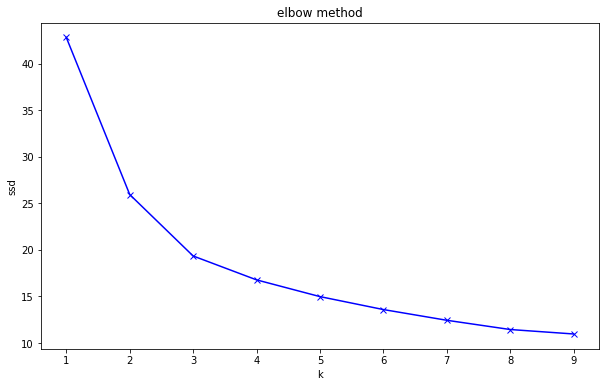

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(K,ssd,'bx-')
plt.xlabel("k")
plt.ylabel('ssd')
plt.title('elbow method')
plt.show()


**Finally we chosse a cluster of 3 as they are most suitable in accordace to the data taken**

In [ ]:
final=KMeans(n_clusters=3)
final.fit(scaled_data)

pr1=final.labels_
print(pr1)

[1 2 2 1 2 2 2 0 0 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 1 2 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


# Plotting the diffrent clustered countries in their colourset

In [ ]:
#now we can only see relation between two feature how do they corelate in accordance to the 3 clusters formed
exp.scatter(data_frame= x,x = 'child_mort',y = 'health',color=pr1)

**Saperating countries in accordance to their clusters**

In [ ]:
a=[]
b=[]
c=[]
j=0
df.iloc[1,0]
for i in pr1:
    if i == 0:
        a.append(df.iloc[j,0])
    if i == 1:
        b.append(df.iloc[j,0])
    if i == 2:
        c.append(df.iloc[j,0])
    else:
        continue
    j+=1    

 ****cluster 1****

In [ ]:
print(a)

['Argentina', 'Argentina', 'Bahrain', 'Benin', 'Bolivia', 'Burkina Faso', 'Burkina Faso', 'Burkina Faso', 'Central African Republic', 'Central African Republic', 'Chad', 'Chad', 'Comoros', 'Costa Rica', 'Costa Rica', 'Costa Rica', "Cote d'Ivoire", 'Cyprus', 'Egypt', 'Eritrea', 'Germany', 'Germany', 'Germany', 'Guinea-Bissau', 'Guinea-Bissau', 'Indonesia', 'Indonesia', 'Indonesia', 'Iran', 'Iran', 'Israel', 'Israel', 'Kiribati', 'Kiribati', 'Kiribati']


**cluster 2**

In [ ]:
print(b)

['Afghanistan', 'Algeria', 'Bangladesh', 'Bhutan', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Bosnia and Herzegovina', 'Brunei', 'Brunei', 'Brunei', 'Bulgaria', 'Canada', 'Canada', 'Central African Republic', 'Central African Republic', 'Chad', 'China', 'China', 'Colombia', 'Costa Rica', 'Cyprus', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Dominican Republic', 'El Salvador', 'El Salvador', 'Eritrea', 'Eritrea', 'Gambia', 'Georgia', 'Germany', 'Germany', 'Ghana', 'Haiti', 'Iceland', 'Indonesia', 'Indonesia', 'Ireland', 'Italy', 'Jamaica', 'Jamaica', 'Kenya', 'Lebanon', 'Lebanon']


**cluster 3**

In [ ]:
print(c)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwa